In [1]:
# imports for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import GridSpec instead of Gridspec
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency,f_oneway,jarque_bera,probplot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import data_clean_utils
import missingno as msno

In [2]:
# load the data
df = pd.read_csv('swiggy.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
data_clean_utils.perform_data_cleaning(data=df)

In [4]:
df_final = pd.read_csv('swiggy_cleaned.csv')
df_final.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium


# Preliminary Analysis #

In [5]:
df_final.isnull().sum()

,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,3630
restaurant_longitude,3630
delivery_latitude,3630
delivery_longitude,3630
order_date,0
weather,525
traffic,510


In [6]:
missing_rowa = (
    df_final.isnull()
    .any(axis=1)
    .sum()
)

In [7]:
print(f'There are {missing_rowa} rows with missing values')
print(f"it accounts for {(missing_rowa/df_final.shape[0])*100:.2f}% of the data")

There are 7807 rows with missing values
it accounts for 17.16% of the data


In [8]:
df_final.duplicated().sum()

0

In [9]:
df_final.dtypes

,0
rider_id,object
age,float64
ratings,float64
restaurant_latitude,float64
restaurant_longitude,float64
delivery_latitude,float64
delivery_longitude,float64
order_date,object
weather,object
traffic,object


In [10]:
df_final.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,44509.000000,45502.000000,45502.000000,45502.000000,45502.000000,43862.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,1.019406,0.744928,26.297591,13.811657,2.980726,0.274867,9.989399,17.423966,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,0.835229,0.572488,9.386419,8.709540,0.546031,0.446452,4.087516,4.817856,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,0.000000,0.000000,19.000000,6.000000,3.000000,0.000000,5.000000,15.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,1.000000,1.000000,26.000000,13.000000,3.000000,0.000000,10.000000,19.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,2.000000,1.000000,32.000000,20.000000,3.000000,1.000000,15.000000,21.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,31.000000,4.000000,1.000000,15.000000,23.000000,20.969489


In [11]:
# summary for categorical columns
df_final.describe(include='object')

,rider_id,order_date,weather,traffic,type_of_order,type_of_vehicle,festival,city_type,city_name,order_day_of_week,order_time_of_day,distance_type
count,45502,45502,44977,44992,45502,45502,45274,44304,45502,45502,43432,41872
unique,1320,44,6,4,4,4,2,3,22,7,4,4
top,PUNERES01DEL01,2022-03-15,fog,low,snack,motorcycle,no,metropolitian,JAP,wednesday,night,medium
freq,67,1190,7654,15477,11512,26427,44380,34029,3439,7077,13773,11288


# matrix plot

<Axes: >

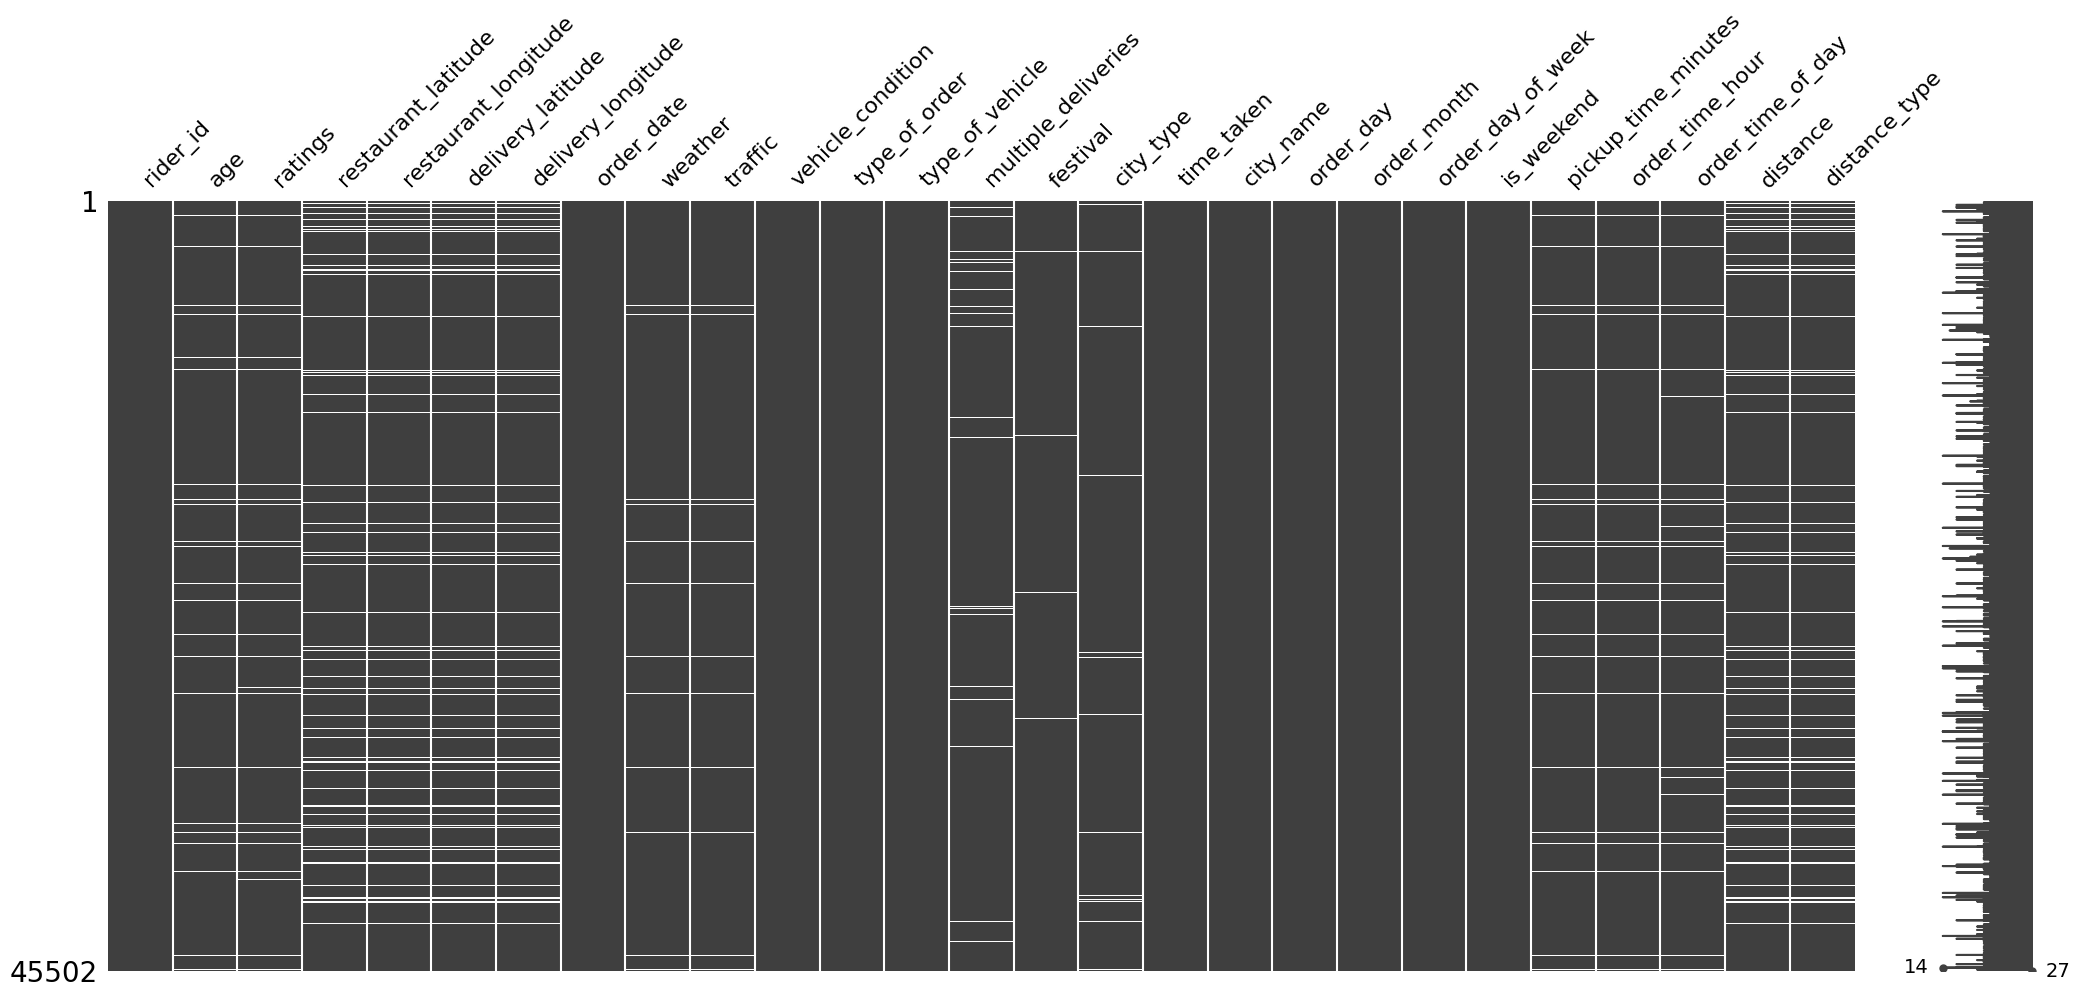

In [12]:
msno.matrix(df_final)

<Axes: >

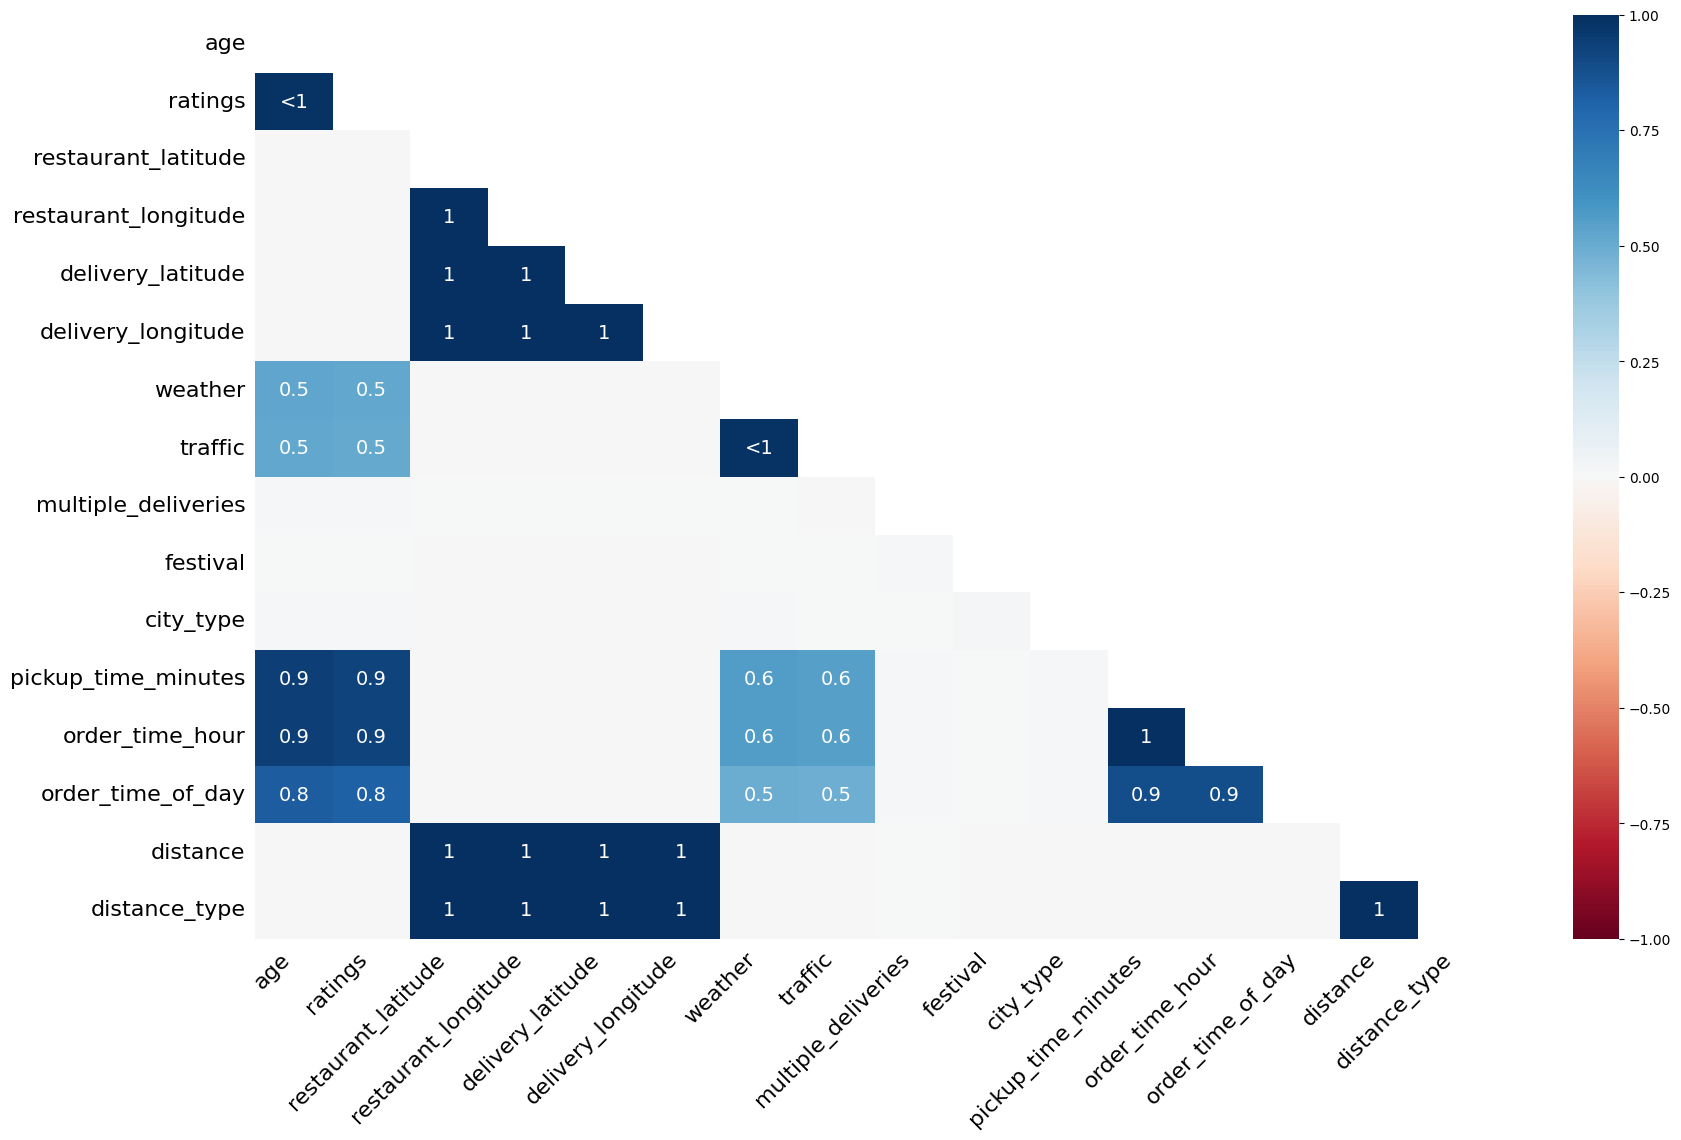

In [14]:
msno.heatmap(df_final)

<Axes: >

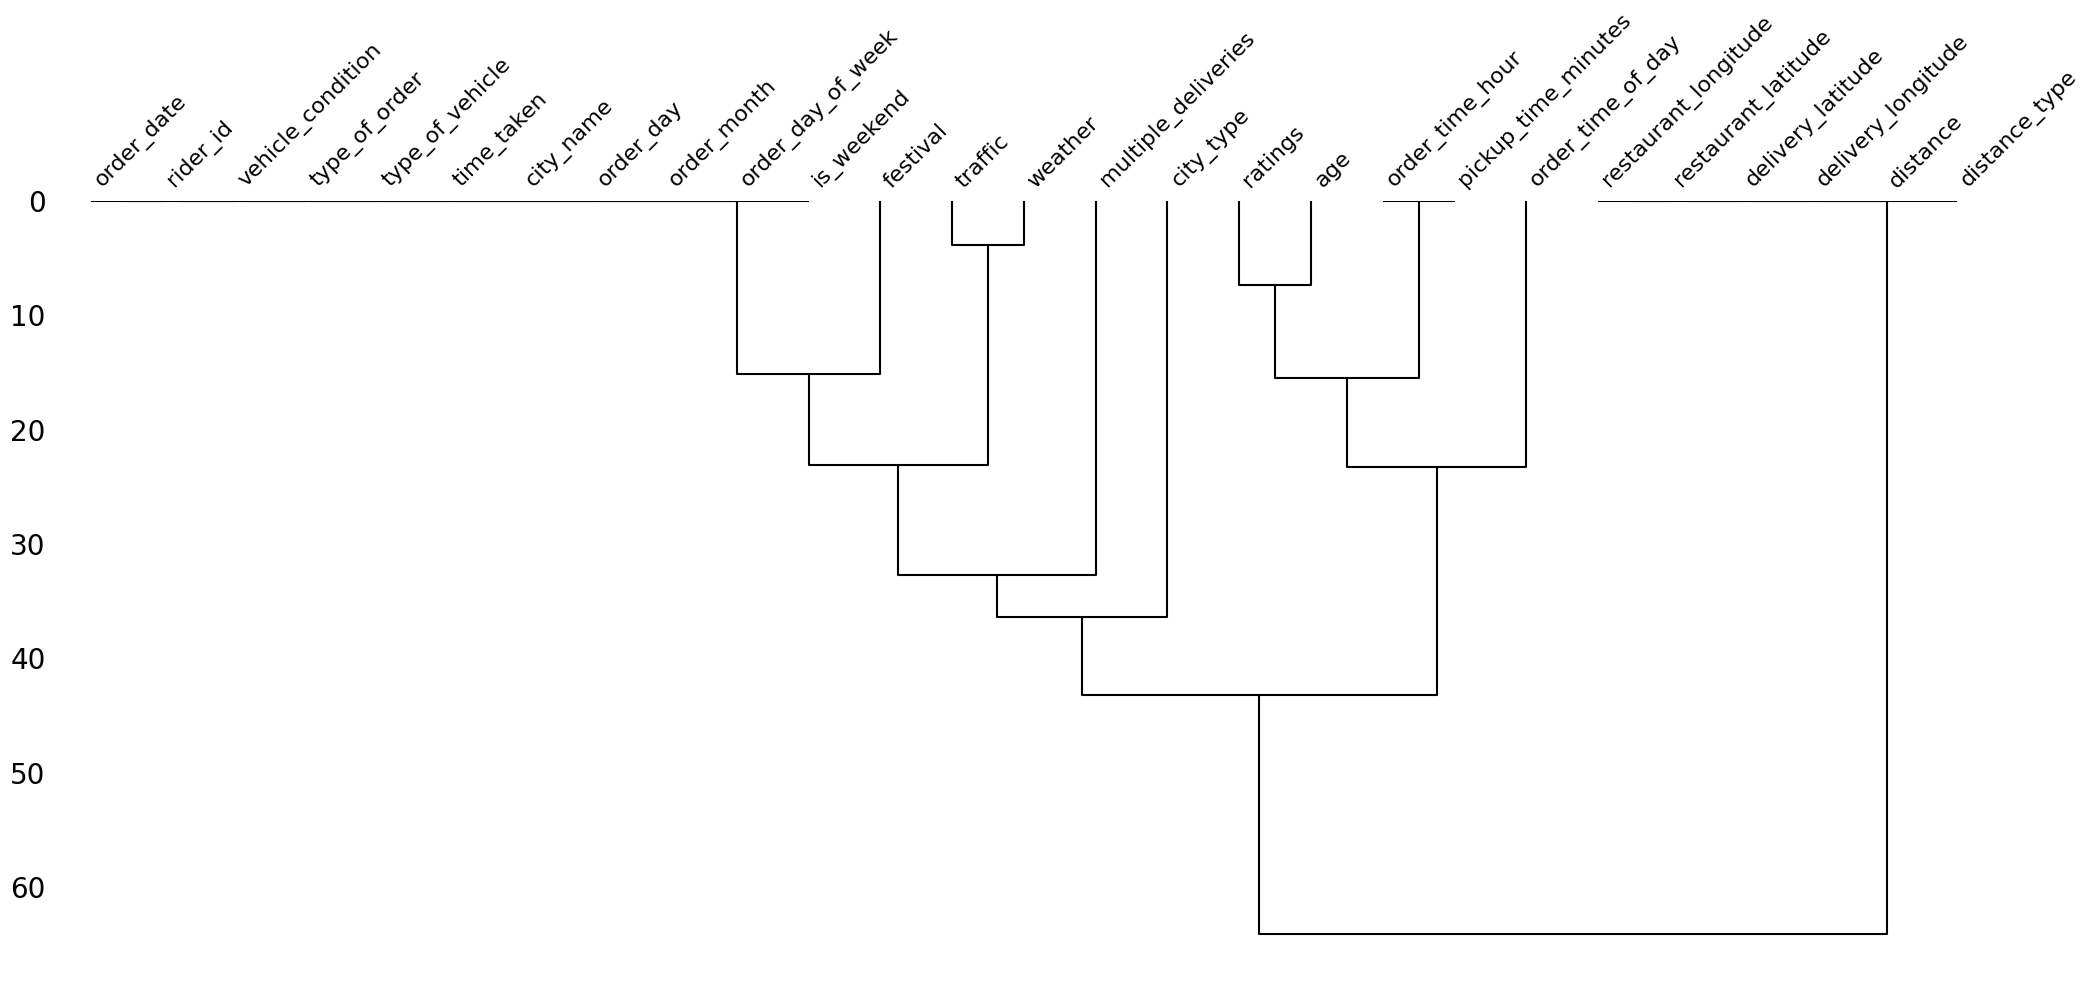

In [15]:
msno.dendrogram(df_final)

# Function to perform analysis

In [64]:
def numerical_analysis(dataframe,column_name,cat_col=None,bins="auto"):
  #created the figure
  fig = plt.figure(figsize=(15,10))
  #gernated the layout
  grid = GridSpec(ncols=2,nrows=2,figure=fig)
  #set subplot
  ax1 = fig.add_subplot(grid[0,0])
  ax2 = fig.add_subplot(grid[0,1])
  ax3 = fig.add_subplot(grid[1,:])
  #plot the kde plot
  sns.kdeplot(data=dataframe,x=column_name,hue=cat_col,ax=ax1)
  #plot the box plot
  sns.boxplot(data=dataframe,x=column_name,hue=cat_col,ax=ax2)
  #plot the histogram
  sns.histplot(data=dataframe,x=column_name,ax=ax3,bins=bins,hue=cat_col,kde=True)

  plt.tight_layout()
  plt.show()

In [124]:
def numerical_categorical_analysis(dataframe,cat_column_1,num_column):
  fig,(ax1,ax2) = plt.subplots(2,2, figsize=(15,7.5))
  # plot the barplot
  sns.barplot(data=dataframe,x=cat_column_1,y=num_column,ax=ax1[0])
  #plot the box
  sns.boxplot(data=dataframe, x=cat_column_1,y=num_column,ax = ax1[1])
  #plot violin plot
  sns.violinplot(data=dataframe,x=cat_column_1,y=num_column,ax = ax2[0])
  #stripplot helps to see data distribution
  sns.stripplot(data=dataframe,x=cat_column_1,y=num_column,ax = ax2[1])
  plt.tight_layout()
  plt.show()




In [146]:
def categprical_analyis(dataframe,column_name):
  display(
      pd.DataFrame({
          "count":(
              dataframe[column_name]
              .value_counts()),
          "percentage":(
                dataframe[column_name]
              .value_counts(normalize=True)
              .mul(100)
              .round(2)
              .astype("str")
              .add("%")
            )
      })
  )
  print("*" * 50)
  #get unique categories
  unique_categories = dataframe[column_name].unique().tolist()
  number_of_categories = dataframe[column_name].nunique()
  print(f"The unique categories in {column_name} are {unique_categories}")
  print("*" * 50)
  print(f"The number of categories in {column_name} is {number_of_categories}")

  sns.countplot(data=dataframe,x=column_name)
  plt.xticks(rotation=45)
  plt.show()

In [67]:
def multivarient_analysis(dataframe,num_column,cat_column_1,cat_column_2):
  fig,(ax1,ax2) = plt.subplots(2,2, figsize=(15,7.5))
  #plot the barplot
  sns.barplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,ax=ax1[0])
  #plot the box plot
  sns.boxplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,gap=0.1,ax=ax1[1])
  #plot violin plot
  sns.violinplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,ax=ax2[0],gap=0.1)
  #stripplot helps to see data distribution
  sns.stripplot(data=dataframe,x=cat_column_1,y=num_column,hue=cat_column_2,ax=ax2[1],jitter=True,dodge=True)
  plt.tight_layout()
  plt.show()


In [131]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_2_test(dataframe, col1, col2, alpha=0.05):
    # Subset the dataframe to include only the columns of interest and drop rows with NaN values
    data = dataframe.loc[:, [col1, col2]].dropna()

    # Create the contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Perform the Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    # Hypothesis testing
    if p_val <= alpha:
        print("Reject the null hypothesis (There is a significant association between the variables)")
    else:
        print("Accept the null hypothesis (There is no significant association between the variables)")



In [69]:
def anova_test(dataframe,num_col1,cat_col2, alpha=0.05):
  data = (
      dataframe.loc[:,[num_col1,cat_col2]]
      .dropna()
  )
  cat_group = data.groupby(cat_col2)
  groups = [group[num_col1].values for _,group in cat_group]
  f_stat,p_val = f_oneway(*groups)
  print(f_stat,p_val)
  if p_val <= alpha:
    print("Reject the null hypothesis")
  else:
    print("Accept the null hypothesis")

In [70]:
from os import PRIO_PGRP
def test_for_normality(dataframe,column_name,alpha=0.05):
  data = dataframe[column_name]
  print("jarque bera Test for Normality")
  _,p_val = jarque_bera(data)
  print(p_val)
  if p_val <= alpha:
    print("Reject the null hypothesis")
  else:
    print("Accept the null hypothesis and the data is normaliy distributed")

#column Wise analysis


In [71]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [72]:
df_final['time_taken'].dtype

dtype('int64')

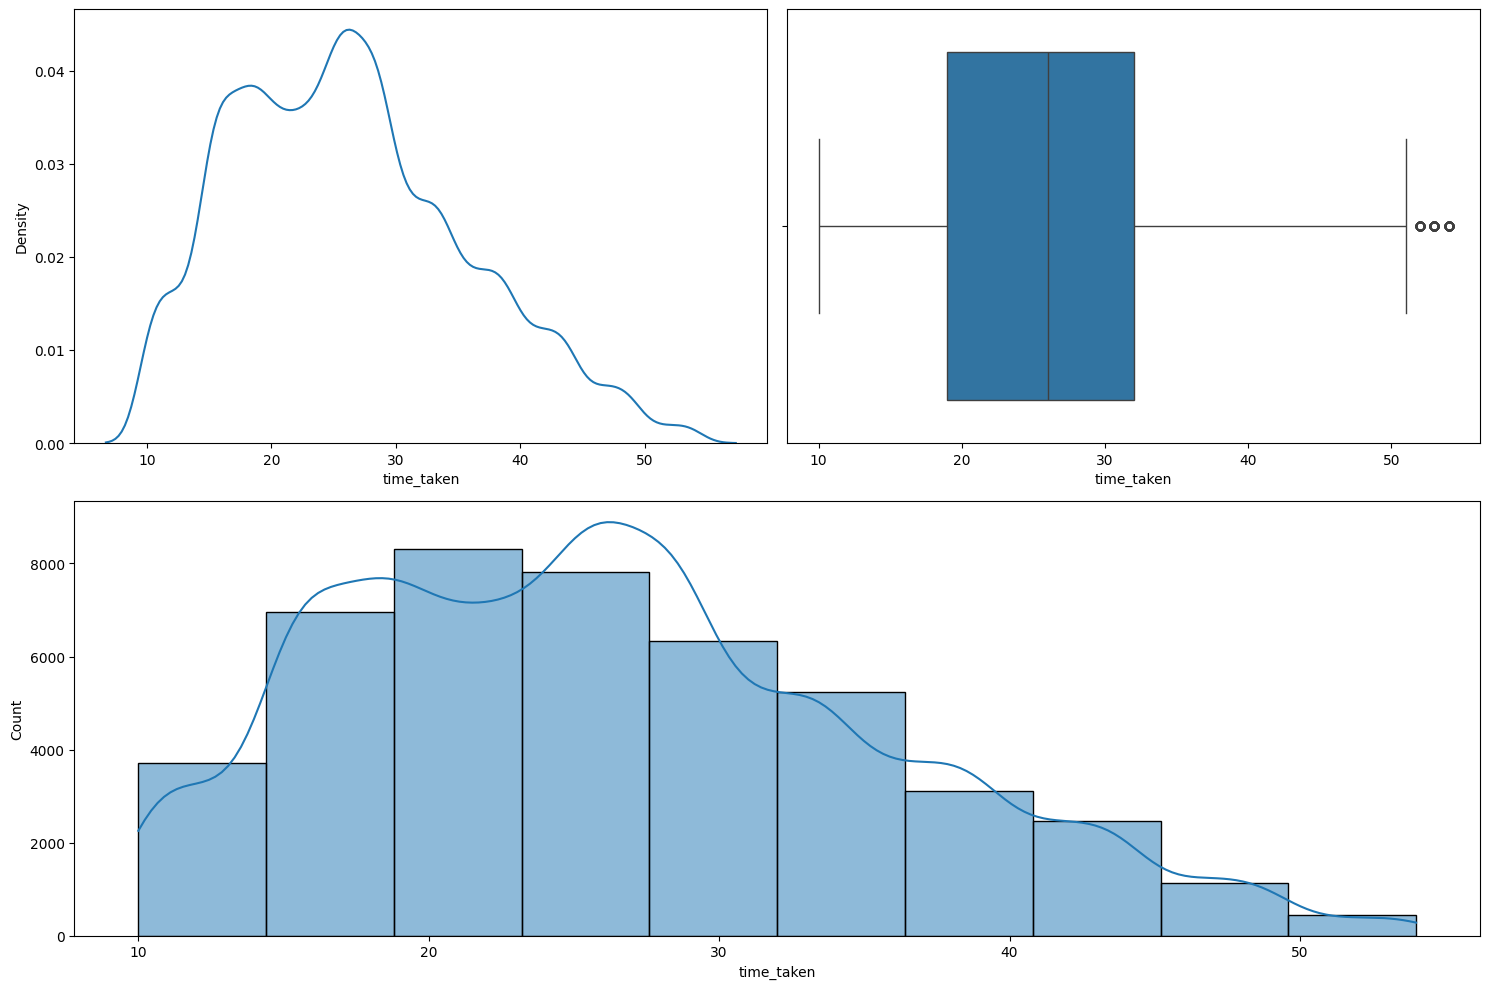

In [73]:
#numberical col anlysis
numerical_analysis(df_final,'time_taken',bins=10)

Observation


1.   The target column is not fully continouse
2.   the target column shows dual modality with two peaks-one peak around the 17-18 mark and other around 26-27 mar





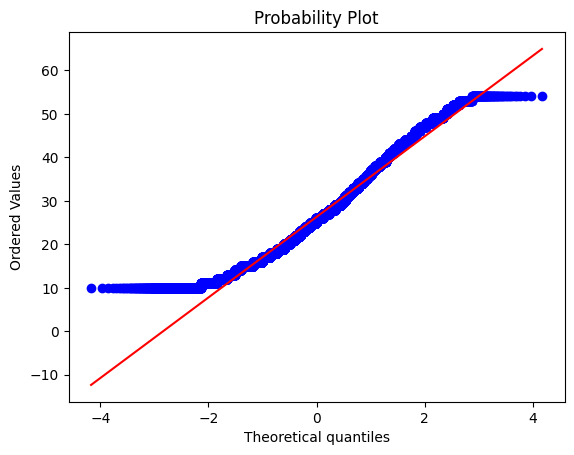

In [77]:
probplot(df_final['time_taken'],plot=plt)
plt.show()

In [78]:
#tests for normality
test_for_normality(df_final,'time_taken')

jarque bera Test for Normality
0.0
Reject the null hypothesis


In [80]:
#check out the rows where data is acting as outlier
target_25_per, target_75_per = np.percentile(df_final['time_taken'],[25,75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5* iqr)

df_final.loc[(df_final['time_taken'] > upper_bound)] ['traffic'].value_counts()

,count
traffic,
jam,241
high,24


In [81]:
df_final.loc[(df_final['time_taken'] > upper_bound)] ['weather'].value_counts()

,count
weather,
fog,57
sunny,51
cloudy,44
windy,44
stormy,37
sandstorms,32


In [82]:
#to fix the target column using transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_final['time_taken'] = pt.fit_transform(df_final[['time_taken']])



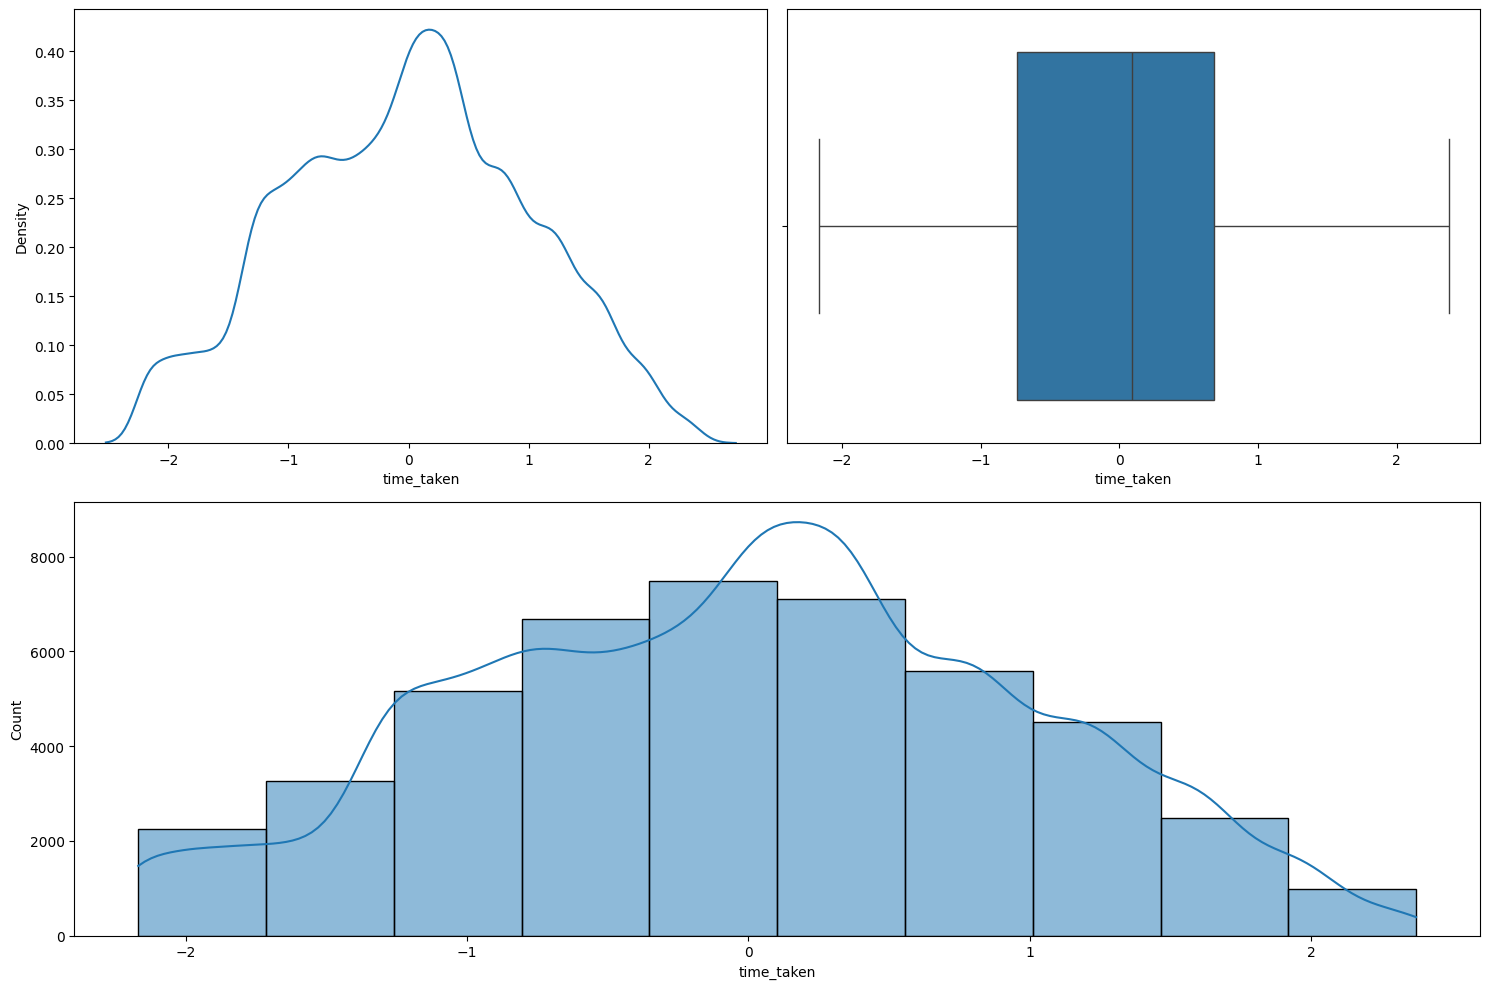

In [83]:
numerical_analysis(df_final,'time_taken',bins=10)

# Rider id

In [86]:
df_final[['rider_id','age','ratings']]

,rider_id,age,ratings
0,INDORES13DEL02,37.0,4.9
1,BANGRES18DEL02,34.0,4.5
2,BANGRES19DEL01,23.0,4.4
3,COIMBRES13DEL02,38.0,4.7
4,CHENRES12DEL01,32.0,4.6
...,...,...,...
45497,JAPRES04DEL01,30.0,4.8
45498,AGRRES16DEL01,21.0,4.6
45499,CHENRES08DEL03,30.0,4.9
45500,COIMBRES11DEL01,20.0,4.7


# age

In [88]:
df_final['age'].dtype

dtype('float64')

In [90]:
df_final['age'].describe()

,age
count,43648.000000
mean,29.555008
std,5.761482
min,20.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,39.000000


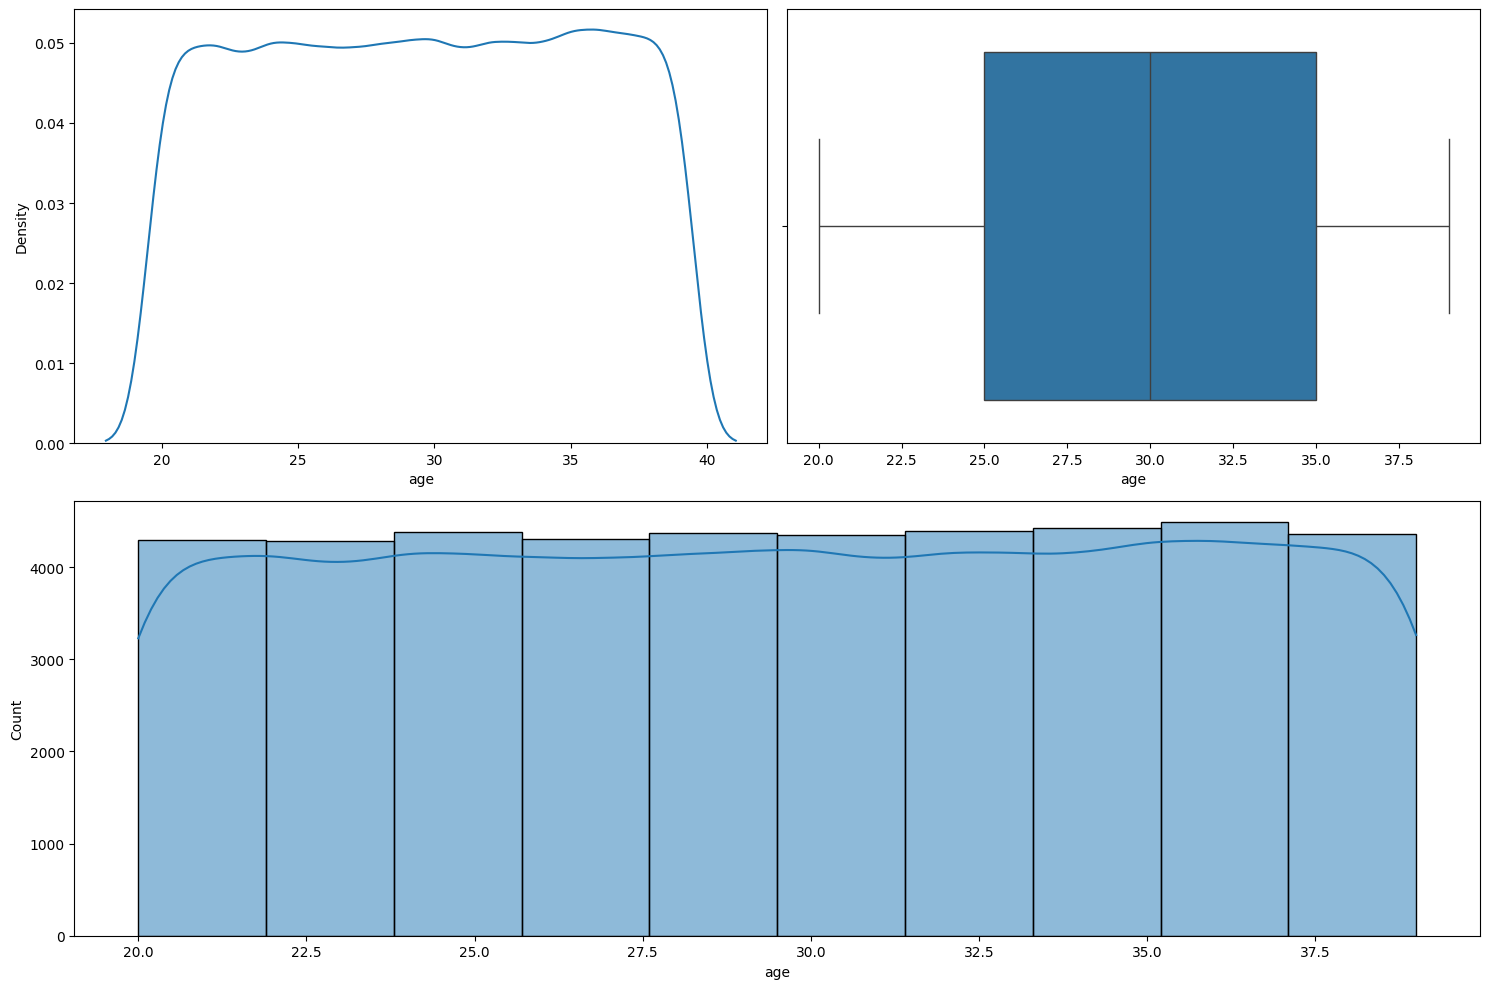

In [91]:
#numerical analyis
numerical_analysis(df_final,'age',bins=10)

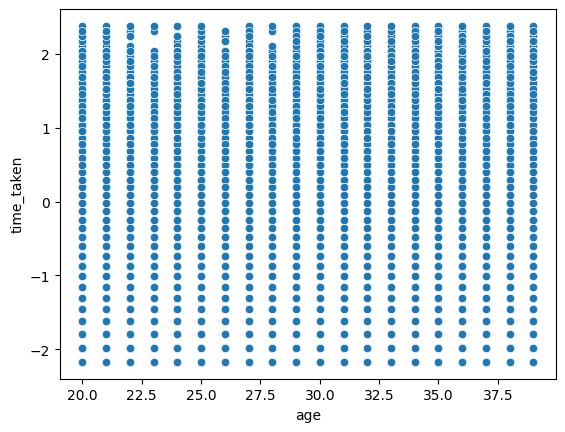

In [92]:
sns.scatterplot(data=df_final,x='age',y='time_taken')
plt.show()

age of the rider dose not impact on time  taken to deliver

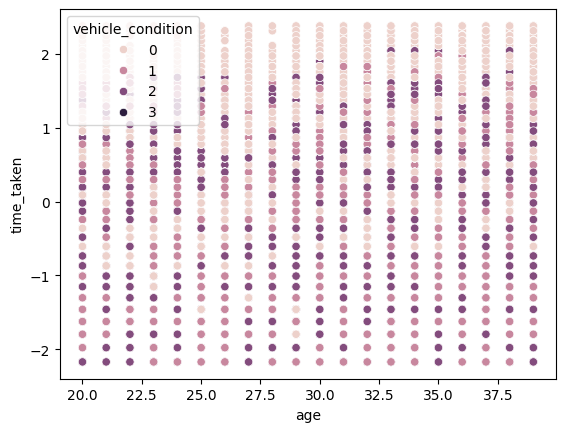

In [93]:
sns.scatterplot(data=df_final,x='age',y='time_taken',hue='vehicle_condition')
plt.show()

# ratings

In [94]:
df_final['ratings'].dtype

dtype('float64')

In [95]:
df_final['ratings'].describe()

,ratings
count,43594.000000
mean,4.635287
std,0.313827
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,5.000000


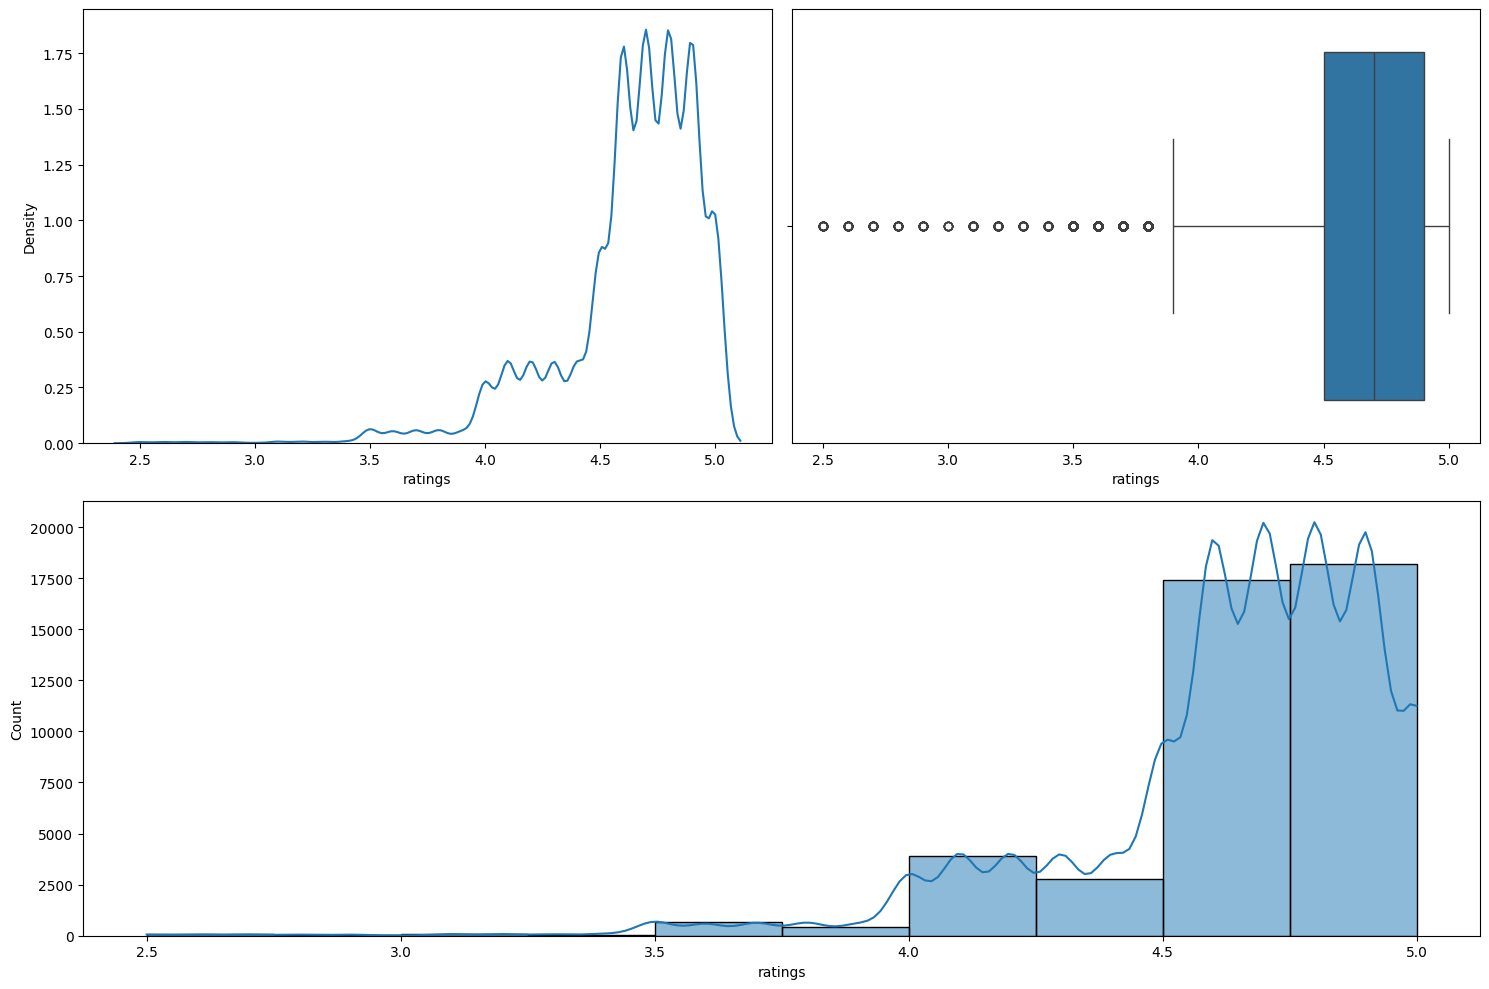

In [96]:
#numerical analyiss
numerical_analysis(df_final,'ratings',bins=10)

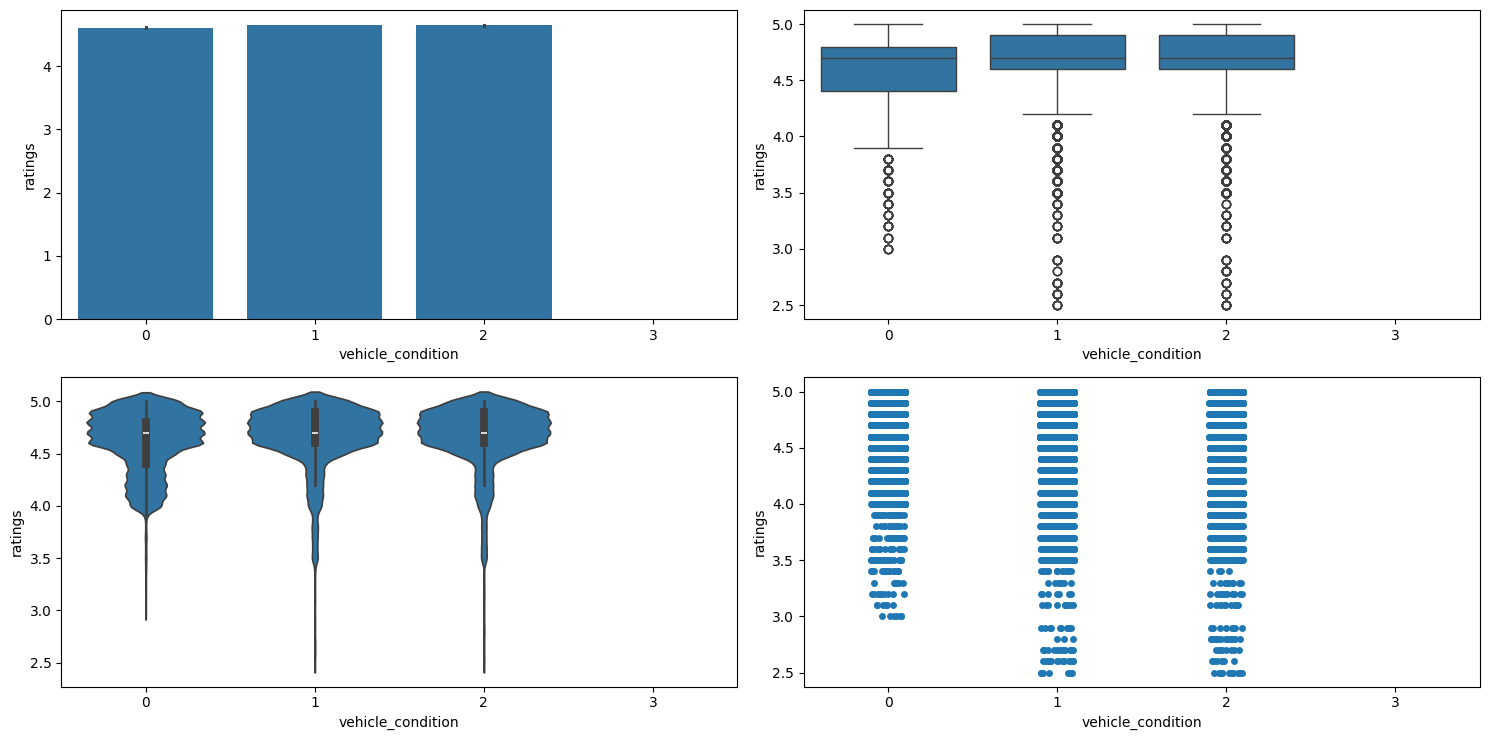

In [109]:
# analyis between rating and vehcial condition
numerical_categorical_analysis(df_final,'vehicle_condition','ratings')

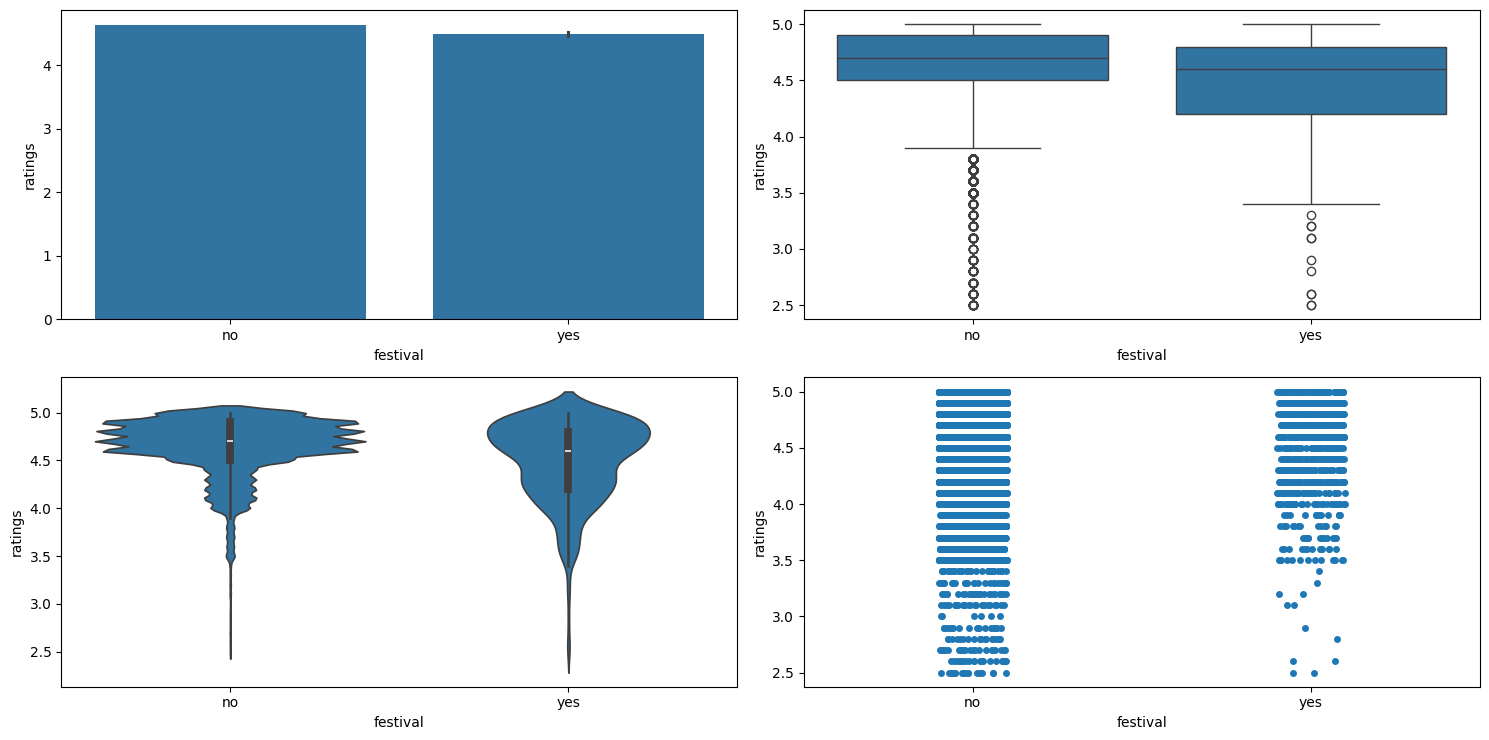

In [110]:
  #analysis between rating and festivel
numerical_categorical_analysis(df_final,'festival','ratings')

# Location based feature


In [111]:
df_final.columns[3:7].tolist()+["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

In [112]:
#location subset
location_subset = df_final.loc[:,df_final.columns[3:7].tolist()+["city_name"]]

In [113]:
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,city_name
0,22.745049,75.892471,22.765049,75.912471,INDO
1,12.913041,77.683237,13.043041,77.813237,BANG
2,12.914264,77.678400,12.924264,77.688400,BANG
3,11.003669,76.976494,11.053669,77.026494,COIMB
4,12.972793,80.249982,13.012793,80.289982,CHEN
...,...,...,...,...,...
45497,26.902328,75.794257,26.912328,75.804257,JAP
45498,NaN,NaN,NaN,NaN,AGR
45499,13.022394,80.242439,13.052394,80.272439,CHEN
45500,11.001753,76.986241,11.041753,77.026241,COIMB


In [114]:
#drop missing values
location_subset.dropna(inplace=True)


In [115]:
# plot deliveries on map
delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    'city_name': location_subset['city_name']
})
#Create a map using Plotly's scatter_mapbox
fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title ='Delivery points',
    hover_name ='city_name'
)
#update the layout for the map of india
fig.update_layout(
    mapbox_style= "carto-positron",
    mapbox_center = {"lat":20.5937,"lon":78.9629},
    mapbox_zoom = 3
)
fig.show()


# Order date

In [116]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [117]:
df_final.filter(like="order")

,order_date,type_of_order,order_day,order_month,order_day_of_week,order_time_hour,order_time_of_day
0,2022-03-19,snack,19,3,saturday,11.0,morning
1,2022-03-25,snack,25,3,friday,19.0,evening
2,2022-03-19,drinks,19,3,saturday,8.0,morning
3,2022-04-05,buffet,5,4,tuesday,18.0,evening
4,2022-03-26,snack,26,3,saturday,13.0,afternoon
...,...,...,...,...,...,...,...
45497,2022-03-24,meal,24,3,thursday,11.0,morning
45498,2022-02-16,buffet,16,2,wednesday,19.0,evening
45499,2022-03-11,drinks,11,3,friday,23.0,night
45500,2022-03-07,snack,7,3,monday,13.0,afternoon


In [118]:
order_date_subset = df_final.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]

In [119]:
order_date_subset

,order_date,order_day,order_month,order_day_of_week,is_weekend,festival
0,2022-03-19,19,3,saturday,1,no
1,2022-03-25,25,3,friday,0,no
2,2022-03-19,19,3,saturday,1,no
3,2022-04-05,5,4,tuesday,0,no
4,2022-03-26,26,3,saturday,1,no
...,...,...,...,...,...,...
45497,2022-03-24,24,3,thursday,0,no
45498,2022-02-16,16,2,wednesday,0,no
45499,2022-03-11,11,3,friday,0,no
45500,2022-03-07,7,3,monday,0,no


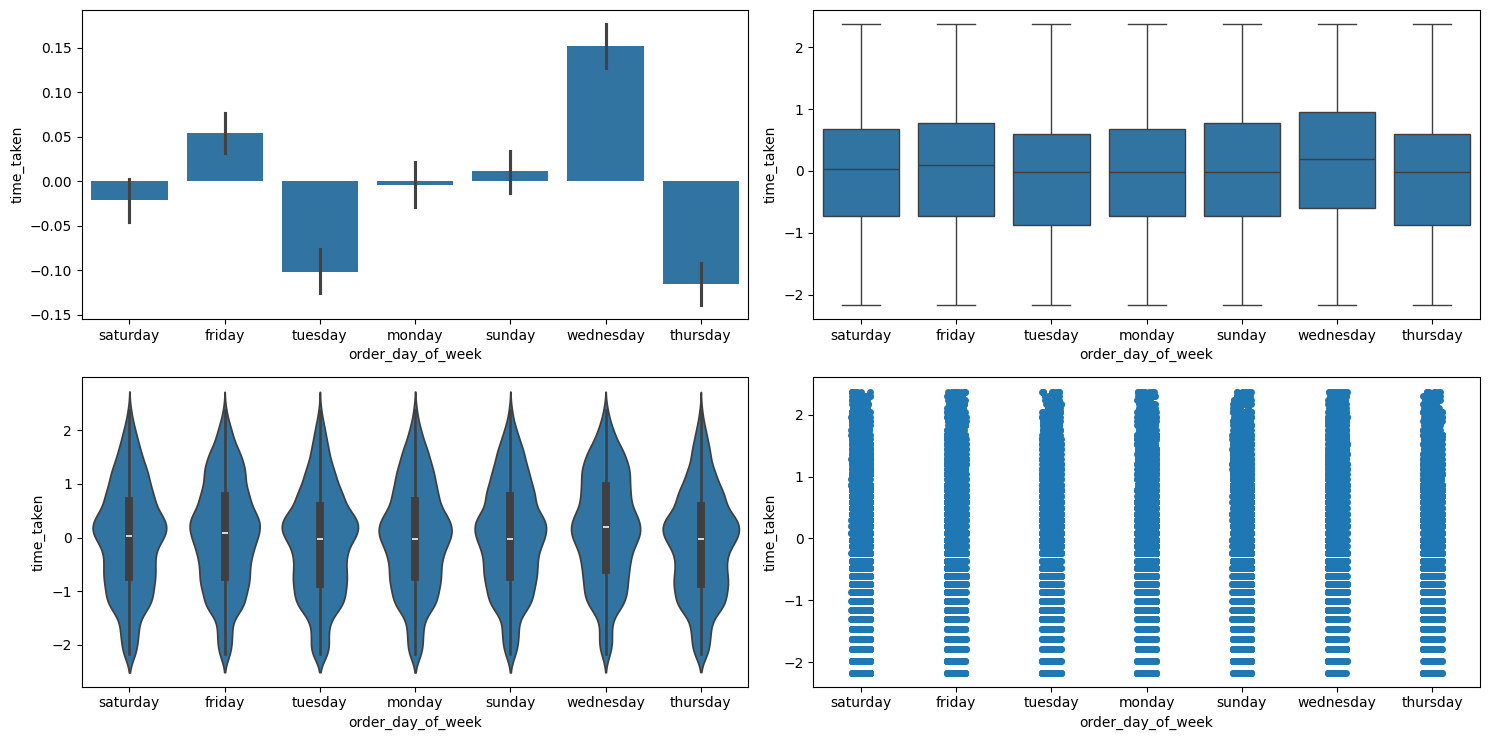

In [125]:
#  analysis between day_of_week and target
numerical_categorical_analysis(df_final,'order_day_of_week','time_taken')

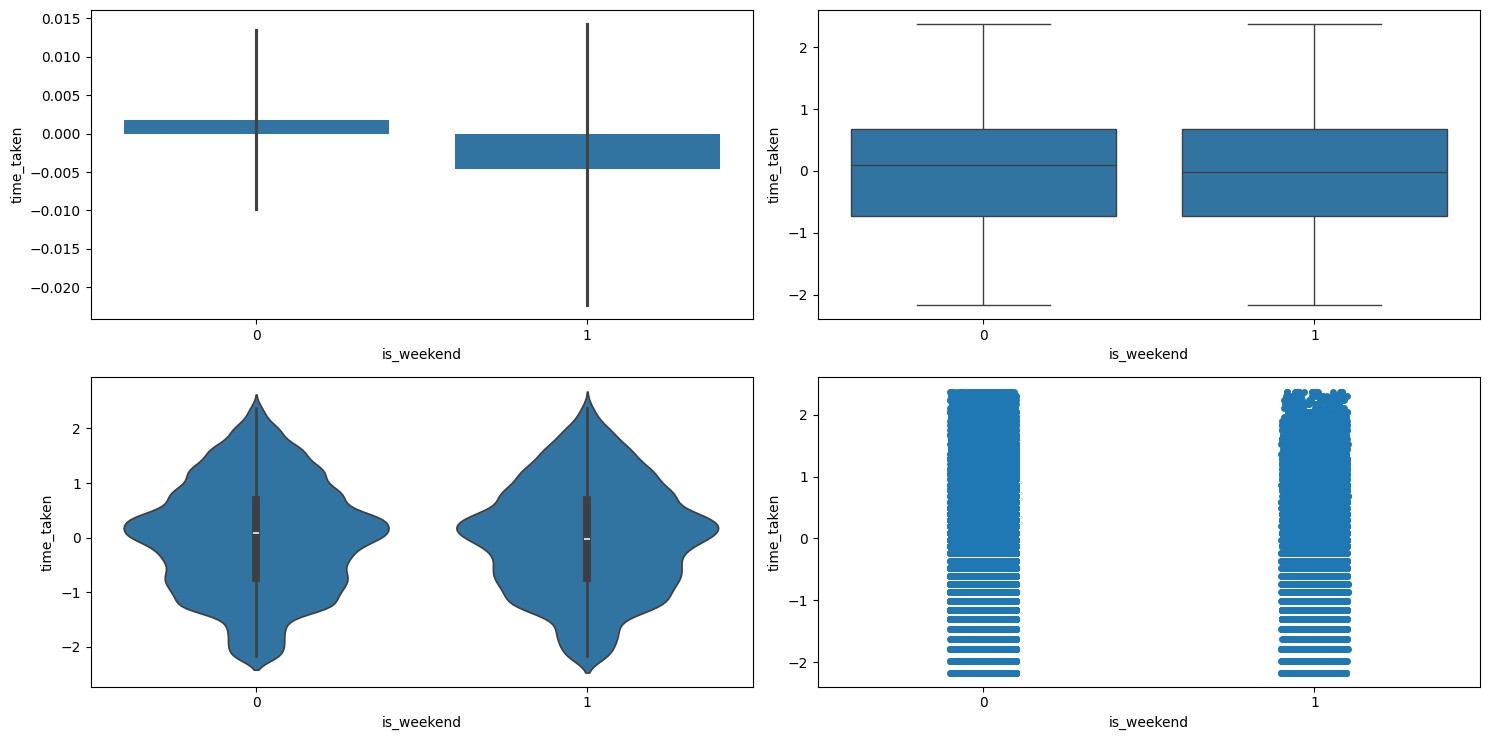

In [126]:
# is_weekend and target
numerical_categorical_analysis(df_final,'is_weekend','time_taken')

In [132]:
chi_2_test(df_final,"is_weekend","traffic")

Accept the null hypothesis (There is no significant association between the variables)


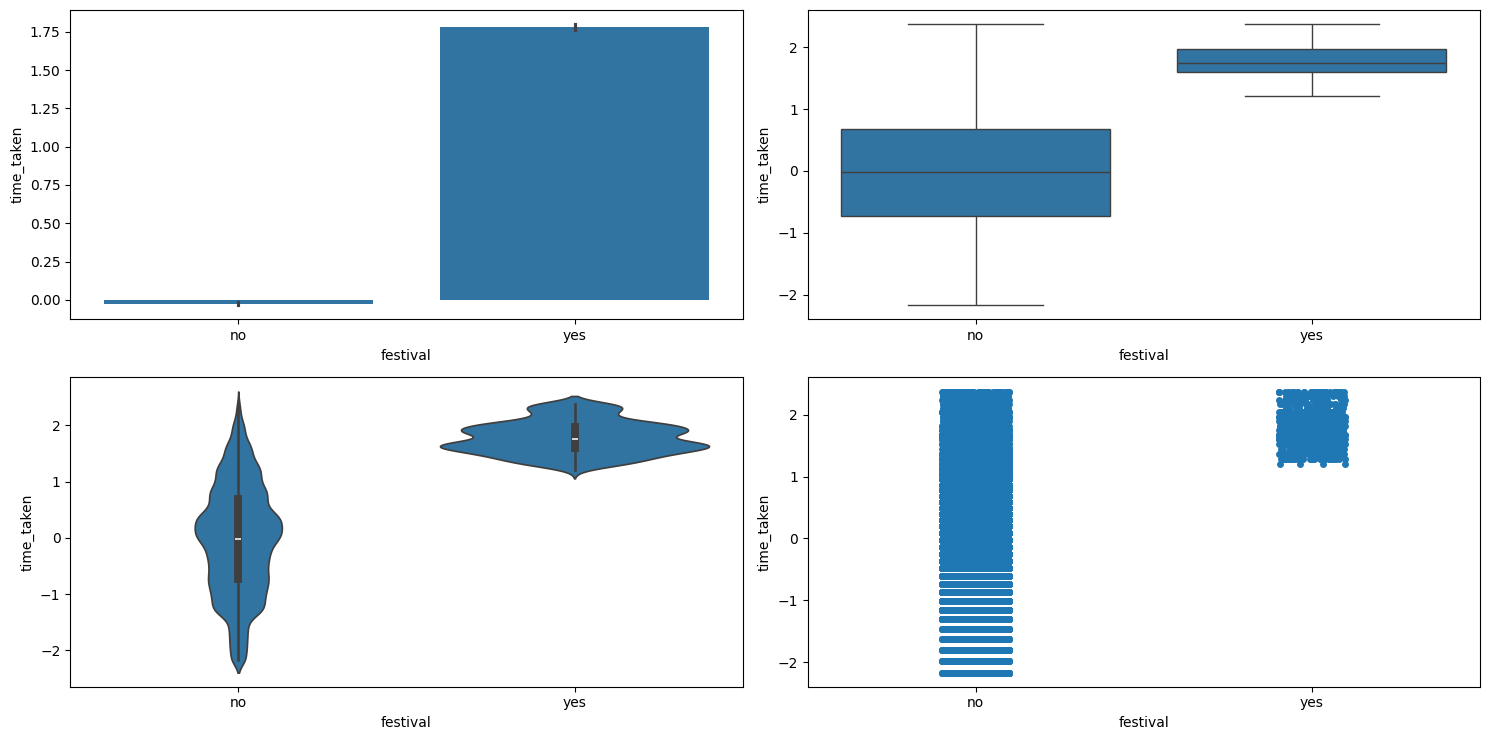

In [133]:
#festivel and target
numerical_categorical_analysis(df_final,'festival','time_taken')

In [134]:
#do festivel affect traffic
chi_2_test(df_final,"festival","traffic")

Reject the null hypothesis (There is a significant association between the variables)


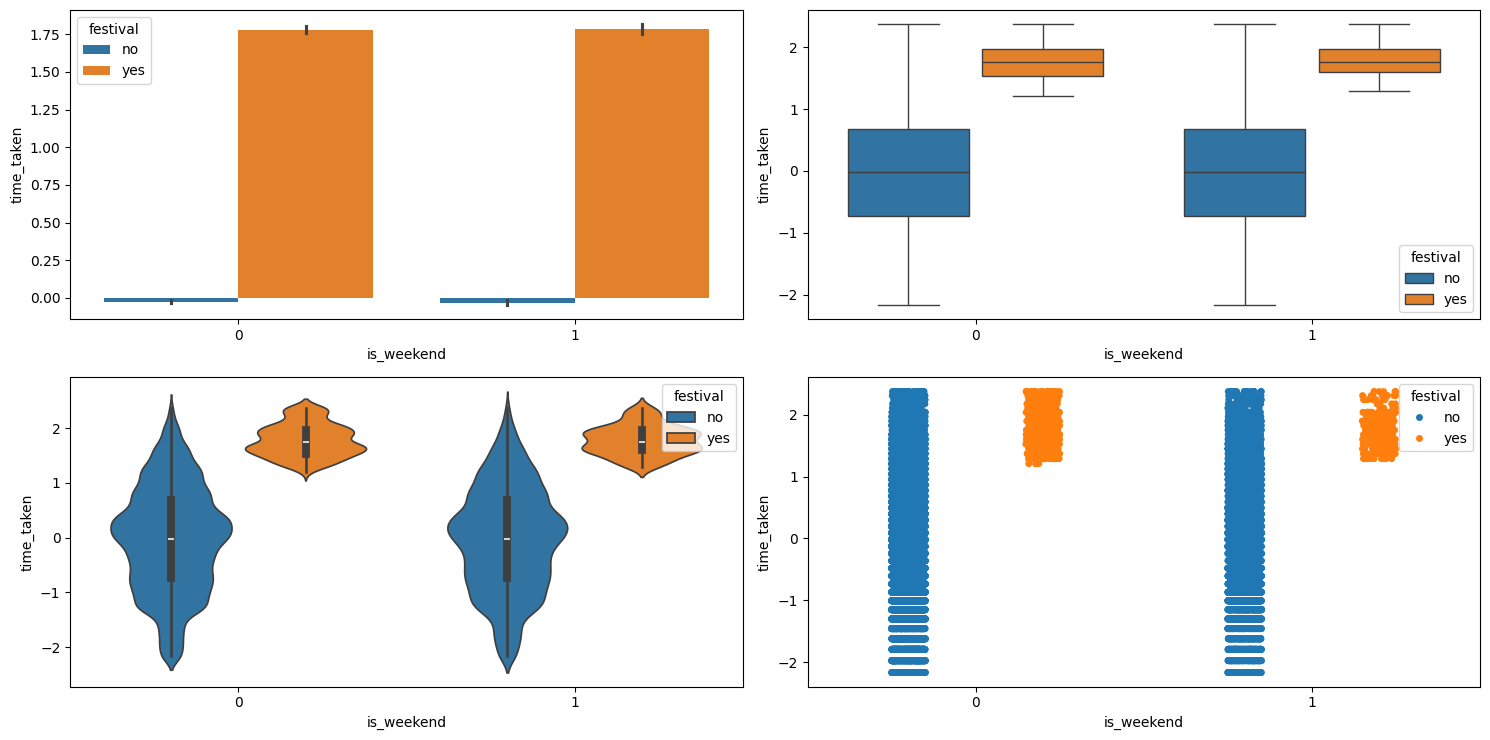

In [135]:
# dose a weekend and a festival combined an affect on delivery time
multivarient_analysis(df_final,'time_taken','is_weekend','festival')

# Order Time

In [137]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [139]:
#time related col
time_related_cols = df_final.loc[:,["order_time_hour","order_time_of_day","pickup_time_minutes"]]

In [140]:
time_related_cols

,order_time_hour,order_time_of_day,pickup_time_minutes
0,11.0,morning,15.0
1,19.0,evening,5.0
2,8.0,morning,15.0
3,18.0,evening,10.0
4,13.0,afternoon,15.0
...,...,...,...
45497,11.0,morning,10.0
45498,19.0,evening,15.0
45499,23.0,night,15.0
45500,13.0,afternoon,5.0


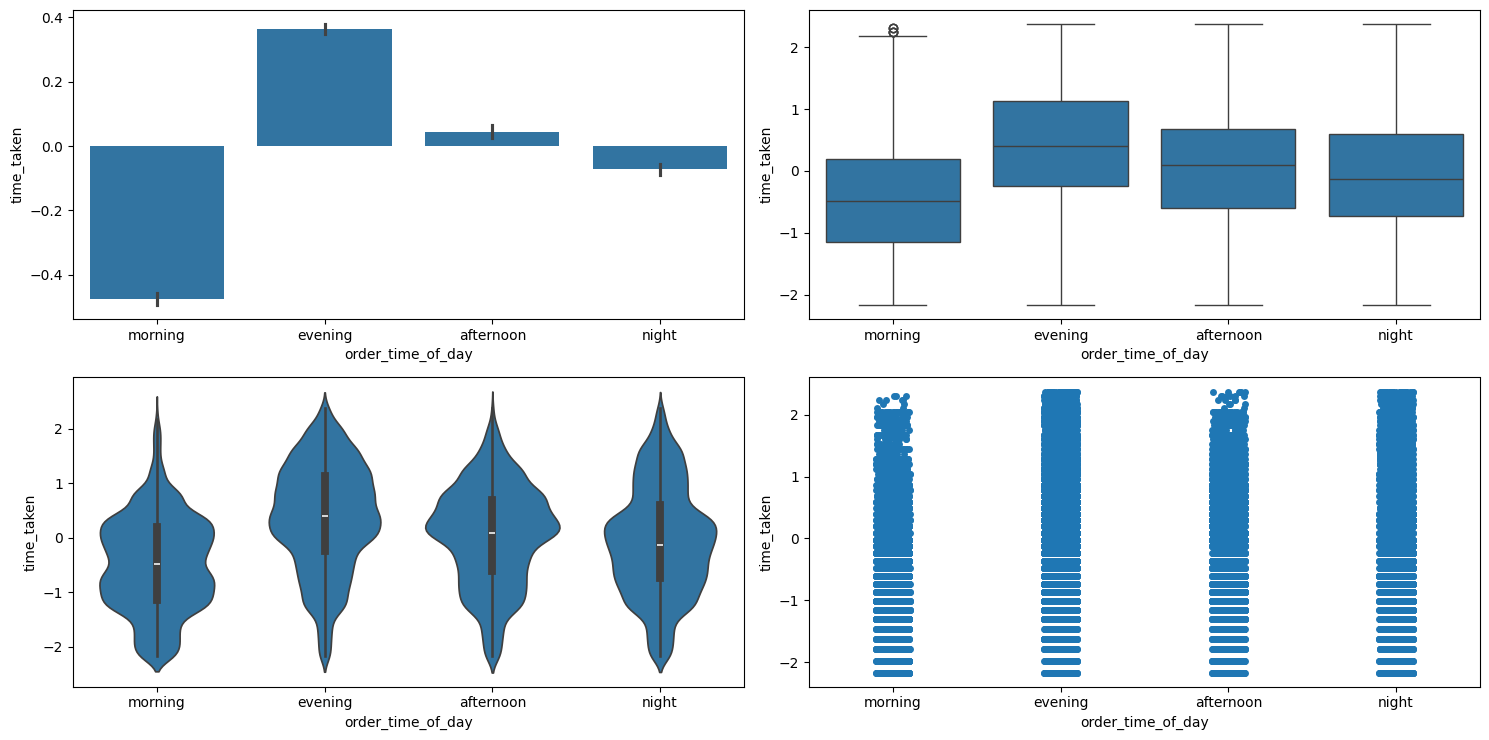

In [141]:
#dose delivery time affected by time_oof day
numerical_categorical_analysis(df_final,'order_time_of_day','time_taken')

In [142]:
#anvo test
anova_test(df_final,'time_taken','order_time_of_day')

1401.1950988601172 0.0
Reject the null hypothesis


,count,percentage
order_time_hour,,
21.0,4686,10.68%
19.0,4595,10.48%
22.0,4576,10.43%
20.0,4539,10.35%
23.0,4511,10.28%
18.0,4480,10.21%
17.0,4278,9.75%
10.0,1991,4.54%
11.0,1962,4.47%


**************************************************
The unique categories in order_time_hour are [11.0, 19.0, 8.0, 18.0, 13.0, 21.0, 17.0, 20.0, 14.0, 9.0, 22.0, 12.0, 23.0, nan, 10.0, 16.0, 15.0, 0.0]
**************************************************
The number of categories in order_time_hour is 17


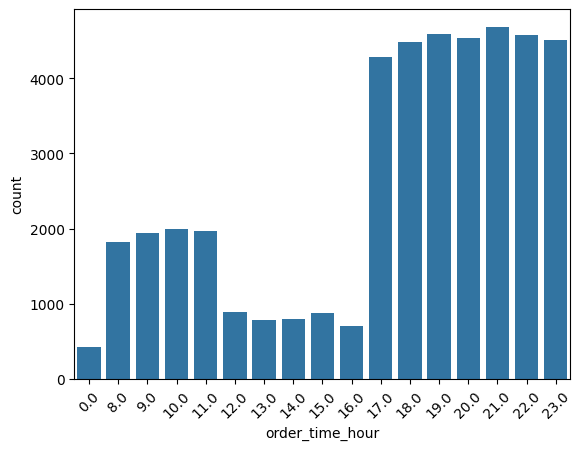

In [148]:
#categorical analysis on order_Time
categprical_analyis(df_final,"order_time_hour")

,count,percentage
order_time_of_day,,
night,13773,31.71%
evening,13614,31.35%
morning,8610,19.82%
afternoon,7435,17.12%


**************************************************
The unique categories in order_time_of_day are ['morning', 'evening', 'afternoon', 'night', nan]
**************************************************
The number of categories in order_time_of_day is 4


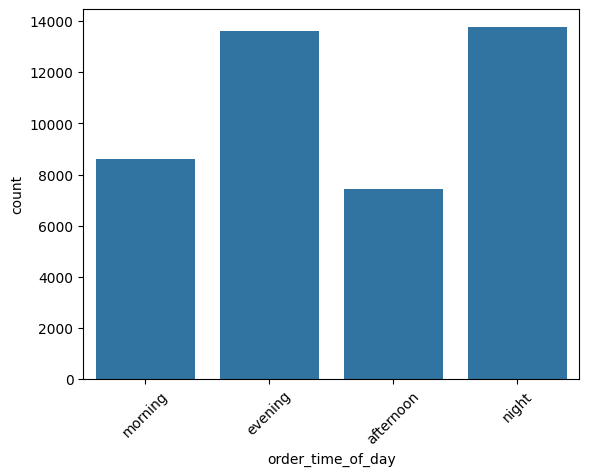

,count,percentage
order_time_of_day,,
night,13773,31.71%
evening,13614,31.35%
morning,8610,19.82%
afternoon,7435,17.12%


**************************************************
The unique categories in order_time_of_day are ['morning', 'evening', 'afternoon', 'night', nan]
**************************************************
The number of categories in order_time_of_day is 4


In [149]:
#categorical analyis on time of day
categprical_analyis(df_final,"order_time_of_day")

# traffic

In [151]:
df_final['traffic'].dtype

dtype('O')

,count,percentage
traffic,,
low,15477,34.4%
jam,14143,31.43%
medium,10947,24.33%
high,4425,9.84%


**************************************************
The unique categories in traffic are ['high', 'jam', 'low', 'medium', nan]
**************************************************
The number of categories in traffic is 4


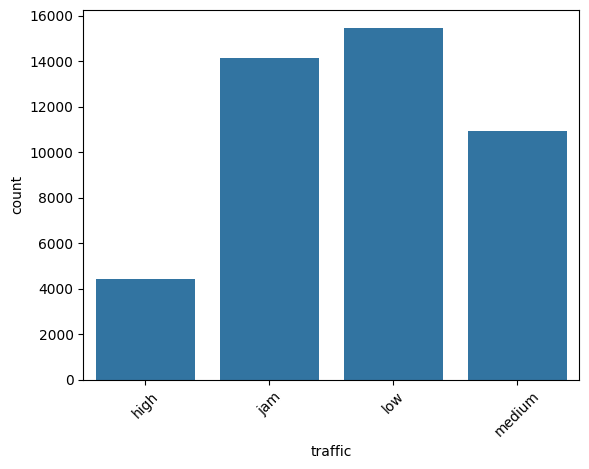

In [152]:
# categorical analyis on traffic
categprical_analyis(df_final,"traffic")

In [153]:
#dose traffic deepends on city_type
chi_2_test(df_final,"traffic","city_type")

Reject the null hypothesis (There is a significant association between the variables)


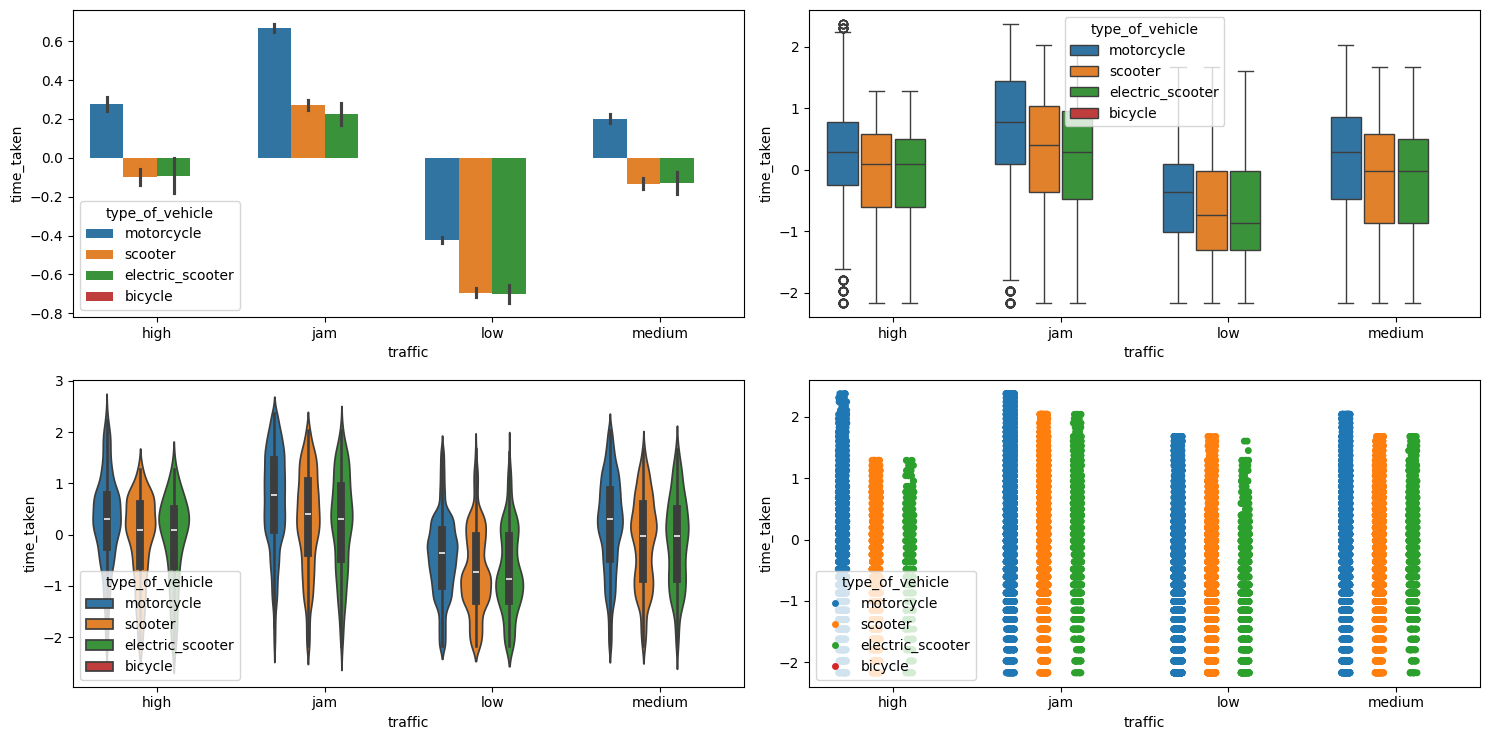

In [155]:
#are some vehicle type more suitable in trafic then other
multivarient_analysis(df_final,'time_taken','traffic','type_of_vehicle')

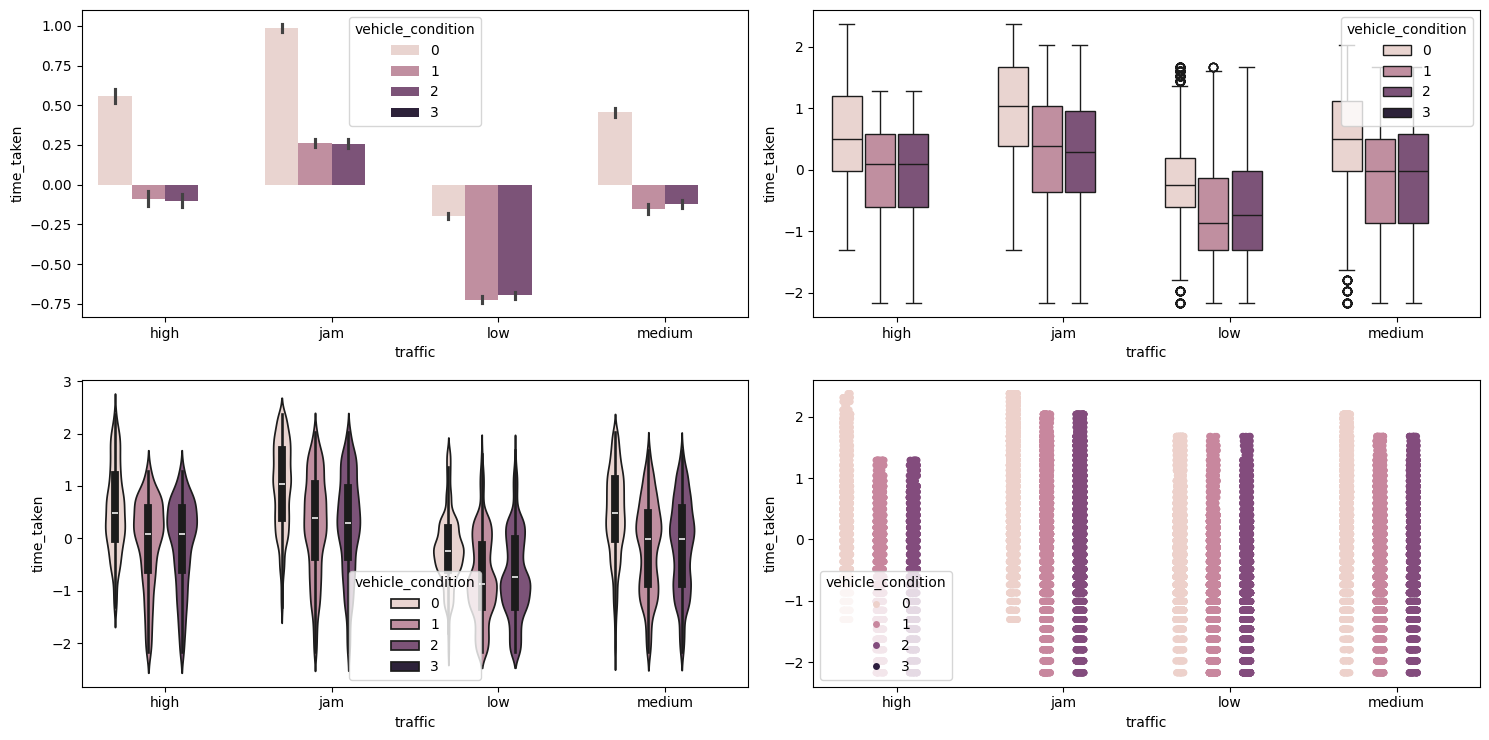

In [156]:
multivarient_analysis(df_final,'time_taken','traffic','vehicle_condition')

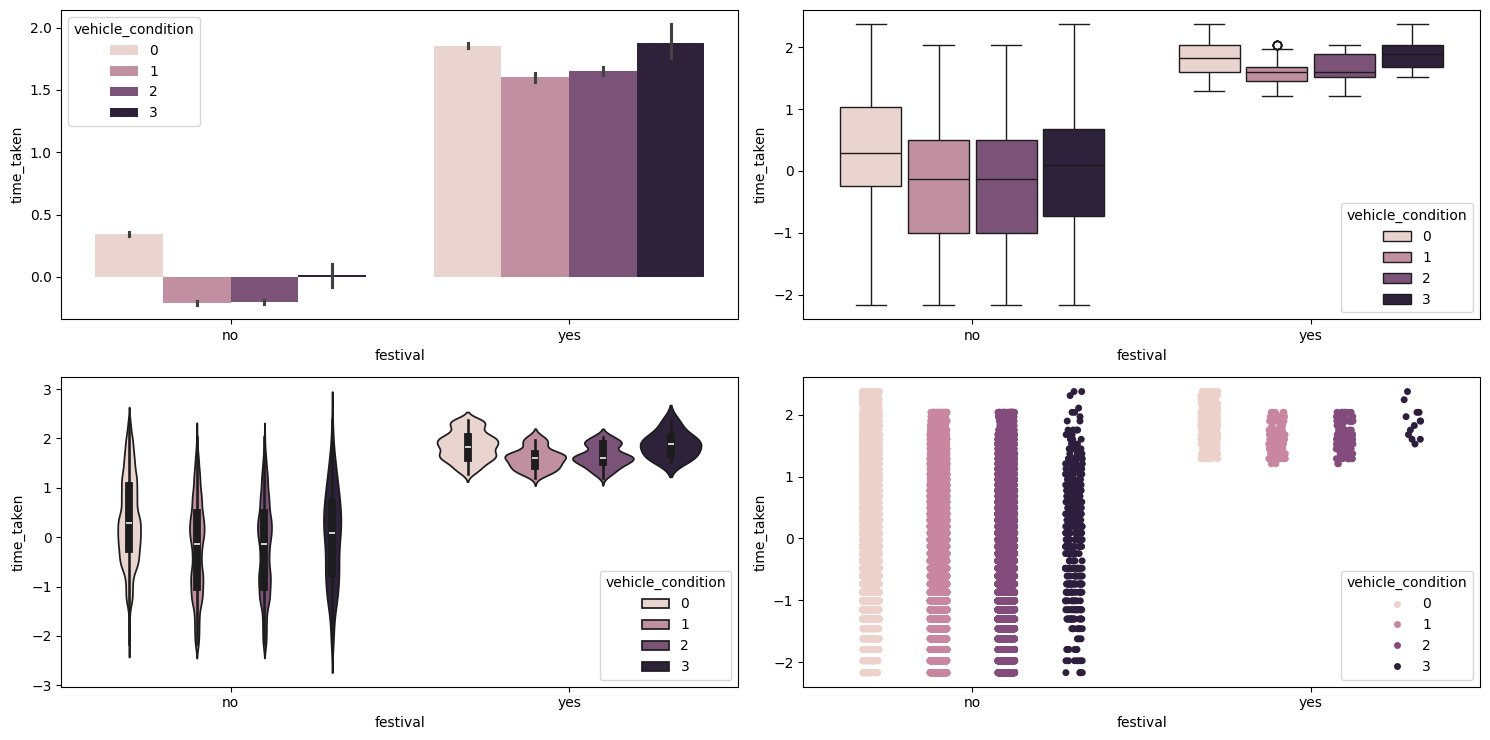

In [158]:
multivarient_analysis(df_final,'time_taken','festival','vehicle_condition')

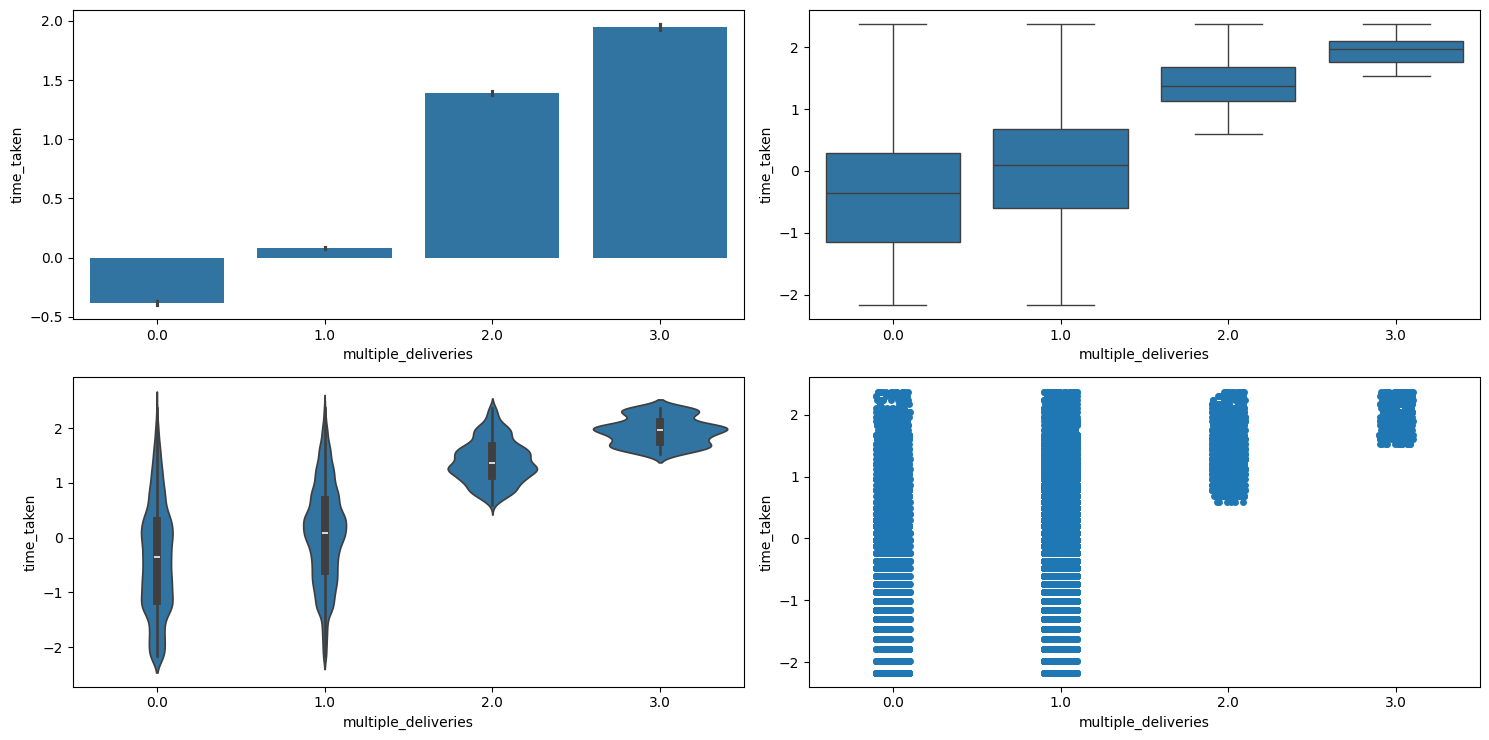

In [159]:
numerical_categorical_analysis(df_final,'multiple_deliveries','time_taken')